<a id='top'></a>

Non-linear Fano Interferences in Open Quantum Systems: an Exactly Solvable Model

Updates of the software will appear at finoqs.wordpress.com

Table of Contents <br> <br>
Part I: Symbolic section <br>
[I.A Libraries and declaration of variables](#Libraries_and_variables) <br>
[I.B Effective Liouvillian (not interactive)](#Effective_Liouvillian) <br>
[I.C Calculation of $\rho$ (not interactive)](#rho_calculation) <br>
[I.D Calculation to extract effective Fano parameters (not interactive)](#Effective_Parameters) <br>
[I.E Display effective parameters (main result of the paper)](#Display_Expressions) <br> <br>
Part II: Numeric simulations <br>
[II.A Build numeric functions from symbolic functions](#build_functions) <br>
[II.B Plots for effective parameters](#Plotting_Parameters) <br>
[II.C Plot of $\int dk \rho_{kk}$ for induced transparency plots](#induced_transparency) <br>
[II.D Plot of $\int dk \rho_{kk}$ for Fano profiles](#plotting_profiles) <br>

<a id='Libraries_and_variables'></a>
I.A Libraries and declaration of variables <br>
[Go to top](#top) <br>

In [1]:


######################################################################################
########################             Libraries
######################################################################################
%matplotlib inline
import numpy as np
from numpy import *
import math
import matplotlib.pyplot as plt
import pylab
from pylab import *
from matplotlib.backends.backend_pdf import PdfPages
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False, no_global=True)
from sympy.matrices import *
from __future__ import division
from sympy import *
from sympy import Function, Symbol
from sympy import Matrix, matrices
from sympy import Poly
from sympy import simplify, fraction, sqrt
from sympy.functions import Abs
from sympy import AppliedPredicate, Q
from sympy.assumptions.assume import global_assumptions
from sympy.abc import x
from sympy.utilities.lambdify import lambdify, implemented_function
from matplotlib.backends.backend_pdf import PdfPages 
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [2]:
# Auxiliary functions for plotting

def axis_to_fig(axis):
    fig = axis.figure
    def transform(coord):
        return fig.transFigure.inverted().transform(
            axis.transAxes.transform(coord))
    return transform

def add_sub_axes(axis, rect):
    fig = axis.figure
    left, bottom, width, height = rect
    trans = axis_to_fig(axis)
    figleft, figbottom = trans((left, bottom))
    figwidth, figheight = trans([width,height]) - trans([0,0])
    return fig.add_axes([figleft, figbottom, figwidth, figheight])

In [3]:
######################################################################################
########################         Declaration of variables
######################################################################################
Omega, q,  epsilon, Ee, Ek, beta = symbols('Omega q epsilon Ee Ek beta',real = True)
GammaE, GammaC, ge0 = symbols('GammaE GammaC ge0',real = True, positive = True)

<a id='Effective_Liouvillian'></a>
I.B Effective Liouvillian <br>
[Go to top](#top) <br>

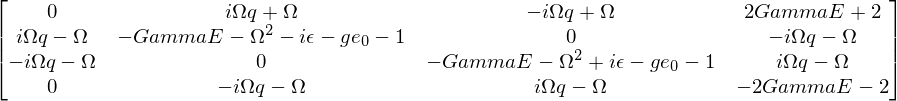

In [17]:
######################################################################################
########################      Define the matrix (L-\Omega_L) (Equations 12-14 ) 
######################################################################################

# In this document, the column or row order is: gg, ge, eg and ee.  

Liouvillian = \
Matrix([[0,2*Omega,2*Omega,0], [0,-Omega**2,0,0],[0,0,-Omega**2,0],[0,0*Omega,0*Omega,0]])+ \
Matrix([[0,-Omega,-Omega,0], [-Omega,0,0,-Omega],[-Omega,0,0,-Omega],[0,-Omega,-Omega,0]])+\
Matrix([[0,0,0,2], [0,-1,0,0],[0,0,-1,0],[0,0,0,-2]])+\
Matrix([[0,I*Omega*q,-I*Omega*q,0], [I*Omega*q,0,0,-I*Omega*q],[-I*Omega*q,0,0,I*Omega*q],[0,-I*Omega*q,I*Omega*q,0]])+\
Matrix([[0,0,0,0], [0,-I*epsilon,0,0],[0,0,I*epsilon,0],[0,0,0,0]])+\
GammaE*Matrix([[0,0,0,2], [0,-1,0,0],[0,0,-1,0],[0,0,0,-2]])+\
Matrix([[0,0,0,0], [0,-ge0,0,0],[0,0,-ge0,0],[0,0,0,0]])

Liouvillian

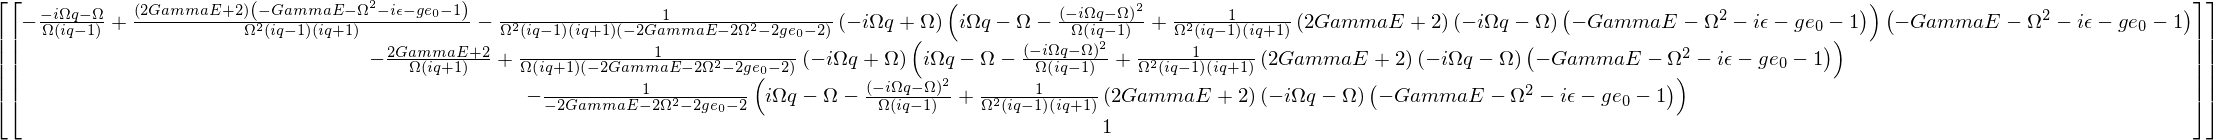

In [5]:
rho0U=Liouvillian.nullspace() 
rho0U



<a id='rho_calculation'></a>
I.C Calculation of $\rho$ <br>
[Go to top](#top) <br>

In [18]:
######################################################################################
########################            Calculate the density matrix rho0
######################################################################################

rho0U=Liouvillian.nullspace() # Calculate the unnormalized density matrix in P as the kernel of the Liouvillian
rhokkU=2/GammaC*( rho0U[0][3] + 2*Omega*re(rho0U[0][1]) + Omega**2*rho0U[0][0] )  # Calculate the population in the conduction band
Norm = rho0U[0][0]+rho0U[0][3]+rhokkU  # Calculate the normalization factor as rho_gg+rho_ee+\int dk rho_kk
rhokknorm=rhokkU/Norm  # Normalize the population in the conduction band
rho0norm=zeros(4) # initializes the variable rho0norm
rho0norm=rho0U[0]/Norm # Normalizes the population in PP as well

transport=GammaC*rhokknorm/rho0norm[0]  # Define the expression for transport

# The element rho0norm[1] corresponds to rho_ge
# The element rho0norm[2] corresponds to rho_eg

<a id='Effective_Parameters'></a>
I.D. Calculation to extract effective Fano parameters <br>
[Go to top](#top) <br>

In [53]:
######################################################################################
###  Isolated open quantum system
### Extracting coefficients of the polynomials from the numerator and denominator
######################################################################################

# Start to find the effective parameters 
# Simplify the norm

r1=simplify(rhokknorm)
num,den = fraction(r1)

# In what follows we will assume
# there is one numerator and one denominator, both of which are quadratic expressions in epsilon

f_den=Poly(den,epsilon)
den_coeffs = f_den.coeffs()
ad_0=den_coeffs[2]          # den_coeffs[2] is for order epsilon^0, a_0
ad_1=den_coeffs[1]          # den_coeffs[1] is for order epsilon^1, a_1
ad_2=den_coeffs[0]          # den_coeffs[0] is for order epsilon^2, a_2

f_num=Poly(num,epsilon)
num_coeffs = f_num.coeffs()
an_0=num_coeffs[2]
an_1=num_coeffs[1]
an_2=num_coeffs[0]

# We make the equivalence
# a_2 epsilon^2 + a_1 epsilon + a_0 = C([(sqrt(B/C)*(epsilon+A))^2+1 ])
# CAREFUL WITH THE INDEX OF coeffs, it is not intuitive

B=simplify(ad_2)
A=simplify(ad_1/(2*ad_2))
C=simplify(ad_0-ad_1**2/(4*ad_2))

######################################################################################
##########       Define effective parameters based on polynomial coefficients
######################################################################################

GammaEff=simplify(sqrt(C/B))  
Prefactor=1/B*an_2
Eeff=Ee-A
Qeff=simplify((an_1/(2*an_2)-A)*1/GammaEff)
LorEff=simplify((an_0/an_2-(an_1/(2*an_2))**2))/GammaEff**2 # This is the D parameter from equation 12 in the main text
# The LorEff parameter still needs to be multiplied by the Prefactor to get the full weigth of the Lorentzian. 

# note: There is a problem with the sympy.sqrt routine which precludes it from accepting an array as an argument
# We define the square of the variables GammaEff and Qeff to use in the numerical simulations section.

GammaEffSquare=simplify(C/B)
QeffSquare = Qeff**2

In [54]:
######################################################################################
####    Expressions for transport (same as above but for transport denoted with _tr)
######################################################################################

# Start to find the effective parameters 
# Simplify the norm

r1_tr=simplify(transport)
num_tr,den_tr = fraction(r1_tr)

# Alternatively num and den can be redefined if more convenient, in what follows we will assume
# there is one numerator and one denominator, both of which are quadratic expressions in epsilon

f_den_tr=Poly(den_tr,epsilon)
den_coeffs_tr = f_den_tr.coeffs()
ad_0_tr=den_coeffs_tr[2]          # den_coeffs[2] is for order epsilon^0, a_0
ad_1_tr=den_coeffs_tr[1]          # den_coeffs[1] is for order epsilon^1, a_1
ad_2_tr=den_coeffs_tr[0]          # den_coeffs[0] is for order epsilon^2, a_2

f_num_tr=Poly(num_tr,epsilon)
num_coeffs_tr = f_num_tr.coeffs()
an_0_tr=num_coeffs_tr[2]
an_1_tr=num_coeffs_tr[1]
an_2_tr=num_coeffs_tr[0]

# We make the equivalence
# a_2 epsilon^2 + a_1 epsilon + a_0 = C([(sqrt(B/C)*(epsilon+A))^2+1 ])
# CAREFUL WITH THE INDEX OF coeffs, it is not intuitive

B_tr=simplify(ad_2_tr)
A_tr=simplify(ad_1_tr/(2*ad_2_tr))
C_tr=simplify(ad_0_tr-ad_1_tr**2/(4*ad_2_tr))

######################################################################################
##########       Define effective parameters based on polynomial coefficients
######################################################################################

GammaEff_tr=simplify(sqrt(C_tr/B_tr))  
Prefactor_tr=1/B_tr*an_2_tr
Eeff_tr=Ee-A_tr
Qeff_tr=simplify((an_1_tr/(2*an_2_tr)-A_tr)*1/GammaEff_tr)
LorEff_tr=simplify(an_0_tr/an_2_tr-(an_1_tr/(2*an_2_tr))**2)/GammaEff_tr**2 # This is the D parameter from equation 12 in the main text
# The LorEff parameter still needs to be multiplied by the Prefactor to get the full weigth of the Lorentzian. 

# note: There is a problem with the sympy.sqrt routine which precludes it from accepting an array as an argument
# We define the square of the variables GammaEff and Qeff to use in the numerical simulations section.

GammaEffSquare_tr=simplify(C_tr/B_tr)
QeffSquare_tr = Qeff_tr**2


<a id='Display_Expressions'></a>
I.E. Display effective parameters (Generalization of Equation 16 and equation 18-20 for transport) <br>
[Go to top](#top) <br>

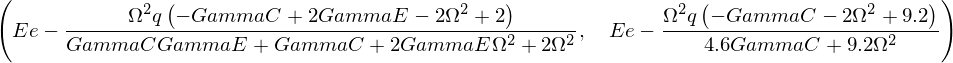

In [20]:
######################################################################################
# Parameters for an isolated open quantum system
######################################################################################

# Write down expression to be displayed, choose from
# GammaEff
# Prefactor
# Eeff
# Qeff
# LorEff

#use Expr.subs(par,const) to replace parameter par by const value in expression Expr

# For example:

Eeff, Eeff.subs(GammaE,3.6)

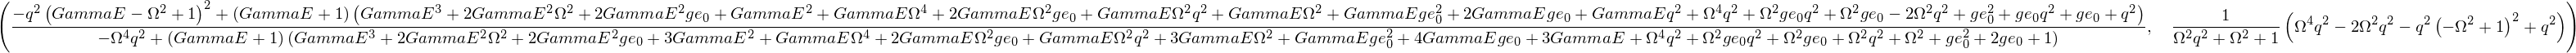

In [27]:
######################################################################################
# Parameters for the transport case
######################################################################################

# Write down expression to be displayed, choose from
# GammaEff_tr
# Prefactor_tr
# Eeff_tr
# Qeff_tr
# LorEff_tr

#use Expr.subs(par,const) to replace parameter par by const value in expression Expr

# For example:

LorEff_tr, LorEff_tr.subs(GammaE,0).subs(ge0,0)

In [11]:





######################################################################################
######################################################################################
################    PLOTTING AND NUMERICAL SIMULATIONS
######################################################################################
######################################################################################





<a id='build_functions'></a>
II.A Build numeric functions from symbolic functions <br>
[Go to top](#top) <br>

In [50]:
# Make the expressions into functions for numeric evaluation

l_rhokknorm = lambdify((epsilon,q,Omega,GammaC,GammaE,ge0), rhokknorm)
l_GammaEff = lambdify((q,Omega,GammaC,GammaE,ge0), GammaEff)
l_Prefactor = lambdify((q,Omega,GammaC,GammaE,ge0), Prefactor)
l_Eeff = lambdify((q,Omega,GammaC,GammaE,ge0,Ee), Eeff)
l_Qeff = lambdify((q,Omega,GammaC,GammaE,ge0), Qeff)
l_LorEff = lambdify((q,Omega,GammaC,GammaE,ge0), LorEff)
l_GammaEffSquare = lambdify((q,Omega,GammaC,GammaE,ge0), GammaEffSquare)
l_QeffSquare = lambdify((q,Omega,GammaC,GammaE,ge0), QeffSquare)

In [96]:
# Make the expressions into functions for numeric evaluation for the case for transport

l_transport = lambdify((epsilon,q,Omega,GammaE,ge0), transport)
l_GammaEff_tr = lambdify((q,Omega,GammaE,ge0), GammaEff_tr)
l_Prefactor_tr = lambdify((q,Omega,GammaE,ge0), Prefactor_tr)
l_Eeff_tr = lambdify((q,Omega,GammaE,ge0,Ee), Eeff_tr)
l_Qeff_tr = lambdify((q,Omega,GammaE,ge0), Qeff_tr)
l_LorEff_tr = lambdify((q,Omega,GammaE,ge0), LorEff_tr)
l_GammaEffSquare_tr = lambdify((q,Omega,GammaE,ge0), GammaEffSquare_tr)
l_QeffSquare_tr = lambdify((q,Omega,GammaE,ge0), QeffSquare_tr)

<a id='Plotting_Parameters'></a> 
II.B Plot for effective parameters <br>
[Go to top](#top) <br>

C:\Users\Daniel\Anaconda\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Daniel\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
C:\Users\Daniel\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


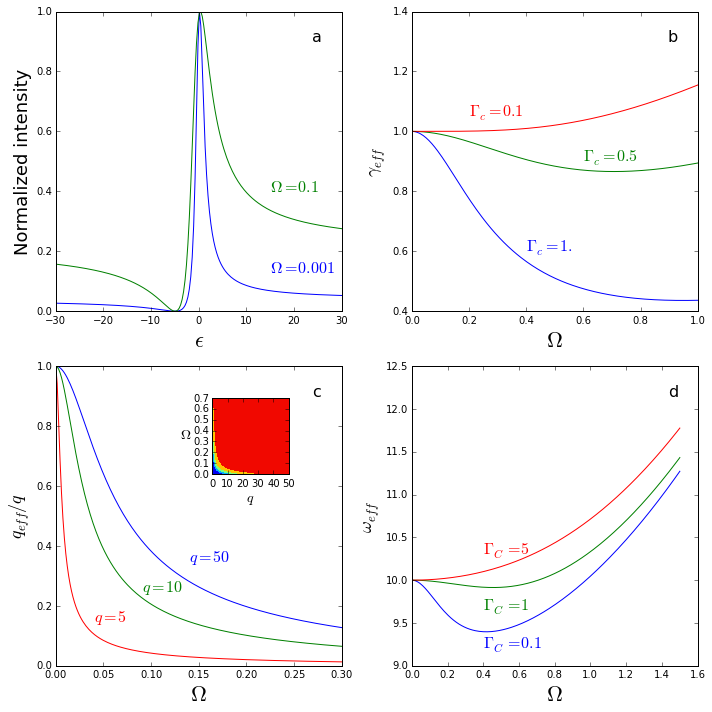

In [14]:
######################################################################################
################               Fano effective parameters (Figure 2)
######################################################################################

#Parameters
Np = 200
emin = -30
emax = 30
e_sample = np.linspace(emin,emax,Np)
fano=l_rhokknorm(e_sample,5.,0.001,0.1,0.,0.)
fano2=l_rhokknorm(e_sample,5.,0.1,0.1,0.,0.)

fig13=plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(e_sample,fano/max(fano)) 
plt.plot(e_sample,fano2/max(fano2)) 
plt.ylabel('Normalized intensity', fontsize=18)
plt.xlabel('$\epsilon$', fontsize=22)
plt.text(15,0.13,'$\Omega=0.001$',fontsize=16,color='b')
plt.text(15,0.4,'$\Omega=0.1$',fontsize=16,color='g')
plt.text(0.9*60-30,0.9*1.,'a',fontsize=16,color='k')


######################################################################################
################               Eeff
######################################################################################

# l_Eeff(q,Omega,GammaC,GammaE,ge0,Ee)

Np = 200
emin = 0
emax = 1.5
omega_sample_E = np.linspace(emin,emax,Np)

# 3 parameters - remember that it is the square of q that we have
e1=l_Eeff(1.,omega_sample_E,0.1,0.,0.,10.)
e2=l_Eeff(1.,omega_sample_E,1.,0.,0.,10.)
e3=l_Eeff(1.,omega_sample_E,5.,0.,0.,10.)


plt.subplot(224)
plt.plot(omega_sample_E,e1)
plt.plot(omega_sample_E,e2)
plt.plot(omega_sample_E,e3)
plt.ylabel('$\omega_{eff}$', fontsize=18)
plt.xlabel('$\Omega$', fontsize=22)
plt.text(0.4,10.3,'$\Gamma_C=5$',fontsize=16,color='r')
plt.text(0.4,9.65,'$\Gamma_C=1$',fontsize=16,color='g')
plt.text(0.4,9.2,'$\Gamma_C=0.1$',fontsize=16,color='b')
plt.text(0.9*1.6,0.9*(12.5-9.)+9.,'d',fontsize=16,color='k')
pylab.ylim([9,12.5])


######################################################################################
################               QEffSquare
######################################################################################

# QEff
# (q,Omega,GammaC,GammaE,ge0)

Np = 200
emin = 0
emax = 0.3
omega_sample_q = np.linspace(emin,emax,Np)

# 3 parameters - remember that it is the square of q that we have
q1=l_QeffSquare(5,omega_sample_q,0.1,0,0)/25
q2=l_QeffSquare(10,omega_sample_q,0.1,0,0)/100
q3=l_QeffSquare(50,omega_sample_q,0.1,0,0)/2500


axes_s = plt.subplot(223)
plt.plot(omega_sample_q,np.sqrt(q1))
plt.plot(omega_sample_q,np.sqrt(q2))
plt.plot(omega_sample_q,np.sqrt(q3))
plt.ylabel('$q_{eff}/q$', fontsize=18)
plt.xlabel('$\Omega$', fontsize=22)
plt.text(0.04,0.15,'$q=5$',fontsize=16,color='r')
plt.text(0.09,0.25,'$q=10$',fontsize=16,color='g')
plt.text(0.14,0.35,'$q=50$',fontsize=16,color='b')
plt.text(0.9*0.30,0.9*1,'c',fontsize=16,color='k')
plt.text(0.13,0.76,'$\Omega$',fontsize=14,color='k')
plt.text(0.20,0.55,'$q$',fontsize=14,color='k')

################################################
# subaxis plot
################################################

# Define the grid
Np = 50
omega_min = 0.
omega_max = 0.7
omega_sample = np.linspace(omega_min,omega_max,Np)
q_min = 0.
q_max = 50.
q_sample = np.linspace(q_min,q_max,Np)

# Define the 2D array to plot it
Zkk=np.zeros((Np, Np))
for i in range(Np):
    for j in range(Np):      
        q_eff=l_Qeff(q_sample[j],omega_sample[i],0.1,0.,0.)
        Zkk[j][i] = 2*omega_sample[i]**2/(2*omega_sample[i]**2+0.1)*(q_eff**2+1)
        
subaxis = add_sub_axes(axes_s, [0.5, 0.6, 0.3, 0.3])
v=[0,0.2,0.4,0.6,0.8,1.]
subaxis.contourf(q_sample, omega_sample, Zkk,v)

######################################################################################
################               GammaEff
######################################################################################

# GammaEffSquare is used instead due to a problem with sympy.sqrt
Np = 200
emin = 0
emax = 1
omega_sample_g = np.linspace(emin,emax,Np)

# 3 parameters
gamma1=l_GammaEffSquare(0,omega_sample_g,0.1,0,0)
gamma2=l_GammaEffSquare(0,omega_sample_g,0.5,0,0)
gamma3=l_GammaEffSquare(0,omega_sample_g,1,0,0)


plt.subplot(222)
plt.plot(omega_sample_g,np.sqrt(gamma1))
plt.plot(omega_sample_g,np.sqrt(gamma2))
plt.plot(omega_sample_g,np.sqrt(gamma3))
plt.ylabel('$\gamma_{eff}$', fontsize=18)
plt.xlabel('$\Omega$', fontsize=22)
plt.text(0.2,1.05,'$\Gamma_c=0.1$',fontsize=16,color='r')
plt.text(0.6,0.90,'$\Gamma_c=0.5$',fontsize=16,color='g')
plt.text(0.4,0.60,'$\Gamma_c=1.$',fontsize=16,color='b')
plt.text(0.9*1.,0.9*(1.4-0.4)+0.4,'b',fontsize=16,color='k')
pylab.ylim([0.4,1.4])


plt.tight_layout()
# 
plt.show()
pp = PdfPages('4-panels.pdf')
pp.savefig(fig13)
pp.close()




<a id='induced_transparency'></a>
Plot of $\int dk \rho_{kk}$ for induced transparecy plots <br>
[Go to top](#top) <br>

C:\Users\Daniel\Anaconda\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\Daniel\Anaconda\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """


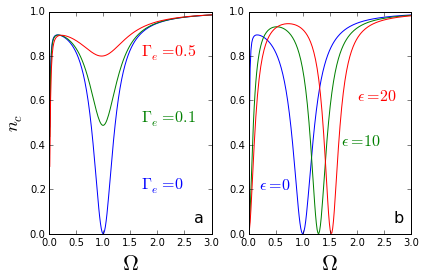

In [15]:
###############################################################
# Induced transparency (Figure 3)
###############################################################

#use l_rhokknorm(epsilon,q,Omega,GammaC,GammaE,ge0)
#Parameters
Np = 200.
Omega_min = 0.
Omega_max = 3.
Omega_sample = np.linspace(Omega_min,Omega_max,Np)

fig11 = plt.figure(11)
plt.subplot(121)
plt.plot(Omega_sample,l_rhokknorm(0.,15.,Omega_sample,0.1,0.0,0.0))
plt.plot(Omega_sample,l_rhokknorm(0.,15.,Omega_sample,0.1,0.1,0.0))
plt.plot(Omega_sample,l_rhokknorm(0.,15.,Omega_sample,0.1,0.5,0.0))
plt.ylabel('$n_c$', fontsize=18)
plt.xlabel('$\Omega$', fontsize=22)
plt.text(1.7,0.2,'$\Gamma_e=0$',fontsize=16,color='b')
plt.text(1.7,0.5,'$\Gamma_e=0.1$',fontsize=16,color='g')
plt.text(1.7,0.8,'$\Gamma_e=0.5$',fontsize=16,color='r')
plt.text(0.9*3,0.05,'a',fontsize=16,color='k')
plt.subplot(122)
plt.plot(Omega_sample,l_rhokknorm(0.,15.,Omega_sample,0.1,0.0,0.0))
plt.plot(Omega_sample,l_rhokknorm(10.,15.,Omega_sample,0.1,0.0,0.0))
plt.plot(Omega_sample,l_rhokknorm(20.,15.,Omega_sample,0.1,0.0,0.0))
plt.text(0.2,0.2,'$\epsilon=0$',fontsize=16,color='b')
plt.text(1.7,0.4,'$\epsilon=10$',fontsize=16,color='g')
plt.text(2.,0.6,'$\epsilon=20$',fontsize=16,color='r')
plt.text(0.9*3,0.05,'b',fontsize=16,color='k')
plt.xlabel('$\Omega$', fontsize=22)
plt.tight_layout()

pp = PdfPages('induced-transparency.pdf')
pp.savefig(fig11)
pp.close()

<a id='plotting_profiles'></a>
Plot of $\int dk \rho_{kk}$ for Fano profiles <br>
[Go to top](#top) <br>

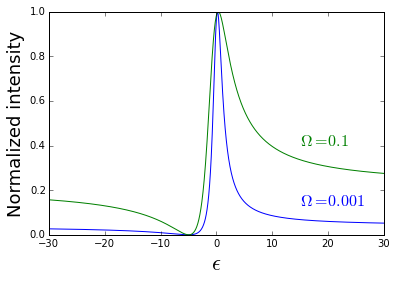

In [16]:
######################################################################################
########################        Plotting rho_kk appears in Fig 2.a
######################################################################################

#Parameters
Np = 2000
emin = -30
emax = 30
e_sample = np.linspace(emin,emax,Np)
fano=l_rhokknorm(e_sample,5.,0.001,0.1,0.,0.)
fano2=l_rhokknorm(e_sample,5.,0.1,0.1,0.,0.)

fig1 = plt.figure(1)

plt.plot(e_sample,fano/max(fano))
plt.plot(e_sample,fano2/max(fano2))
plt.ylabel('Normalized intensity', fontsize=18)
plt.xlabel('$\epsilon$', fontsize=22)
plt.text(15,0.13,'$\Omega=0.001$',fontsize=16,color='b')
plt.text(15,0.4,'$\Omega=0.1$',fontsize=16,color='g')
plt.show()

pp = PdfPages('rhokk.pdf')
pp.savefig(fig1)
pp.close()